In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",10)

In [2]:
df = pd.read_csv('train.csv')

### Preprocessing

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],
        axis=1,
        inplace=True)

#### Apply Function to change sex to 1 for female and 2 for male

In [5]:
df['Female'] = df.Sex.apply(lambda x: 1 if x=='female' else 0)
df.drop('Sex',axis=1)

,PassengerId,Survived,Pclass,Age,Fare,Female
0,1,0,3,22.0,7.2500,0
1,2,1,1,38.0,71.2833,1
2,3,1,3,26.0,7.9250,1
3,4,1,1,35.0,53.1000,1
4,5,0,3,35.0,8.0500,0
...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0
887,888,1,1,19.0,30.0000,1
888,889,0,3,NaN,23.4500,1
889,890,1,1,26.0,30.0000,0


In [6]:
df.dropna(inplace=True)

In [7]:
X = df.drop(['Survived','Age','Sex','Fare'],axis=1).set_index('PassengerId')
y = df[['PassengerId','Survived']].set_index('PassengerId')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.4,
                                                   random_state=None)

### Decision Tree Analysis

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

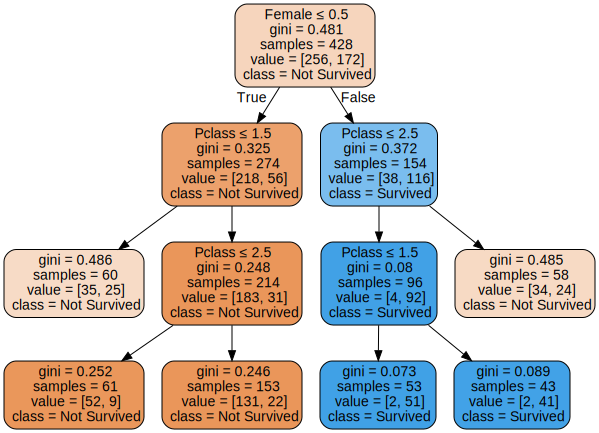

In [14]:
dot_data = tree.export_graphviz(clf,out_file=None,
                               feature_names=X.columns,
                               class_names=['Not Survived','Survived'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Analysis of Training Data Metrics

In [17]:
from sklearn import metrics

In [43]:
y_train_pred = clf.predict(X_train)
print("Training Set Accuracy Score: %.3f" % 
      (metrics.accuracy_score(y_train, y_train_pred)))

Training Set Accuracy Score: 0.804


In [42]:
print("Training Set Classification Report")
print(metrics.classification_report(y_train,y_train_pred))

Training Set Classification Report
             precision    recall  f1-score   support

          0       0.76      0.98      0.86       256
          1       0.96      0.53      0.69       172

avg / total       0.84      0.80      0.79       428



In [37]:
print("Training Set Confusion Matrix")
print(metrics.confusion_matrix(y_train,y_train_pred))

Training Set Confusion Matrix
[[252   4]
 [ 80  92]]


We have a pretty solid accuracy score of ~80% from a first model, but we can see that while precision is good, recall is very low

### Analysis of Testing Data Metrics

In [39]:
y_test_pred = clf.predict(X_test)
print("Test Set Accuracy Score: %.3f" % 
      (metrics.accuracy_score(y_test, y_test_pred)))

Test Set Accuracy Score: 0.773


In [40]:
print("Test Set Classification Report")
print(metrics.classification_report(y_test,y_test_pred))

Test Set Classification Report
             precision    recall  f1-score   support

          0       0.73      0.97      0.83       168
          1       0.92      0.49      0.64       118

avg / total       0.81      0.77      0.75       286



In [41]:
print("Test Set Confusion Matrix")
print(metrics.confusion_matrix(y_test,y_test_pred))

Test Set Confusion Matrix
[[163   5]
 [ 60  58]]


The accuracy score of the test set is slightly lower, indicating there may be some overfitting going on. However, it is not so much lower that we should be immensely worried for a first model attempt.